In [1]:
import numpy as np
from matplotlib import pyplot as plt

import petab.v1.C as C
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

from src._petab import CRP2_CPE as crp
from src.utils.pypesto import create_problem_set, load_pypesto_problem
from src.models.sbml import CRP2_CPE
from src.utils.params import ParameterContainer
from src.utils.plot import plot_all_measurements

%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
pc = ParameterContainer.from_json("/PolyPESTO/src/data/parameters/CRP2_CPE.json")
pg = pc.get_parameter_group("REVERSIBLE")

paths = create_problem_set(CRP2_CPE, pg, crp.exp_1(), force_compile=True)

Creating SBML model (CRP2_CPE).
Creating CRP parameters.
                 filename : /PolyPESTO/src/data/fitting/CRP2_CPE/petab/common/CRP2_CPE.xml
         file size (byte) : 14278
           read time (ms) : 3.556252
        c-check time (ms) : 0.732422
      validation error(s) : 0
    (consistency error(s)): 0
    validation warning(s) : 0
  (consistency warning(s)): 0


Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Compiling amici model to folder /PolyPESTO/amici_models/0.30.0/CRP2_CPE.
2025-02-17 23:01:27.239 - amici.petab.sbml_import - INFO - Importing model ...
2025-02-17 23:01:27.240 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.


PETAB IMPORTER: Output folder:  /PolyPESTO/amici_models/0.30.0/CRP2_CPE
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/CRP2_CPE


2025-02-17 23:01:27.255 - amici.petab.sbml_import - INFO - Model name is 'CRP2_CPE'.
Writing model code to '/PolyPESTO/amici_models/0.30.0/CRP2_CPE'.
2025-02-17 23:01:27.255 - amici.petab.sbml_import - INFO - Species: 7
2025-02-17 23:01:27.256 - amici.petab.sbml_import - INFO - Global parameters: 23
2025-02-17 23:01:27.257 - amici.petab.sbml_import - INFO - Reactions: 0
2025-02-17 23:01:27.277 - amici.petab.sbml_import - INFO - Observables: 2
2025-02-17 23:01:27.277 - amici.petab.sbml_import - INFO - Sigmas: 2
2025-02-17 23:01:27.279 - amici.petab.sbml_import - DEBUG - Adding output parameters to model: []
2025-02-17 23:01:27.281 - amici.petab.sbml_import - DEBUG - Adding initial assignments for []
2025-02-17 23:01:27.286 - amici.petab.sbml_import - DEBUG - Fixed parameters are ['A0', 'B0', 'KAB', 'KBB', 'is_valid_xA', 'kpAA', 'rX']
2025-02-17 23:01:27.288 - amici.petab.sbml_import - INFO - Overall fixed parameters: 7
2025-02-17 23:01:27.288 - amici.petab.sbml_import - INFO - Variable 

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

/usr/local/lib/python3.10/dist-packages/amici/petab/simulations.py:209: RuntimeWarning: The following problem parameters were not used: {'rX', 'KAB', 'KBB'}
  fill_in_parameters(
/usr/local/lib/python3.10/dist-packages/amici/petab/simulations.py:209: RuntimeWarning: The following problem parameters were not used: {'rX', 'KAB', 'KBB'}
  fill_in_parameters(
/usr/local/lib/python3.10/dist-packages/amici/petab/simulations.py:209: RuntimeWarning: The following problem parameters were not used: {'rX', 'KAB', 'KBB'}
  fill_in_parameters(


SIMULATING PETAB MODEL!!!!!
SIMULATING PETAB MODEL!!!!!
SIMULATING PETAB MODEL!!!!!


/usr/local/lib/python3.10/dist-packages/amici/petab/simulations.py:209: RuntimeWarning: The following problem parameters were not used: {'rX', 'KAB', 'KBB'}
  fill_in_parameters(
/usr/local/lib/python3.10/dist-packages/amici/petab/simulations.py:209: RuntimeWarning: The following problem parameters were not used: {'rX', 'KAB', 'KBB'}
  fill_in_parameters(


In [3]:
yaml_path = paths["p5"]
print(yaml_path)
importer, problem = load_pypesto_problem(yaml_path, "CRP2_CPE")

Visualization table not available. Skipping.


/PolyPESTO/src/data/fitting/CRP2_CPE/petab/p5/petab.yaml
PETAB IMPORTER: Output folder:  /PolyPESTO/amici_models/0.30.0/CRP2_CPE
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/CRP2_CPE
Hello world! I'm an AmiciObjective!
Problem created!


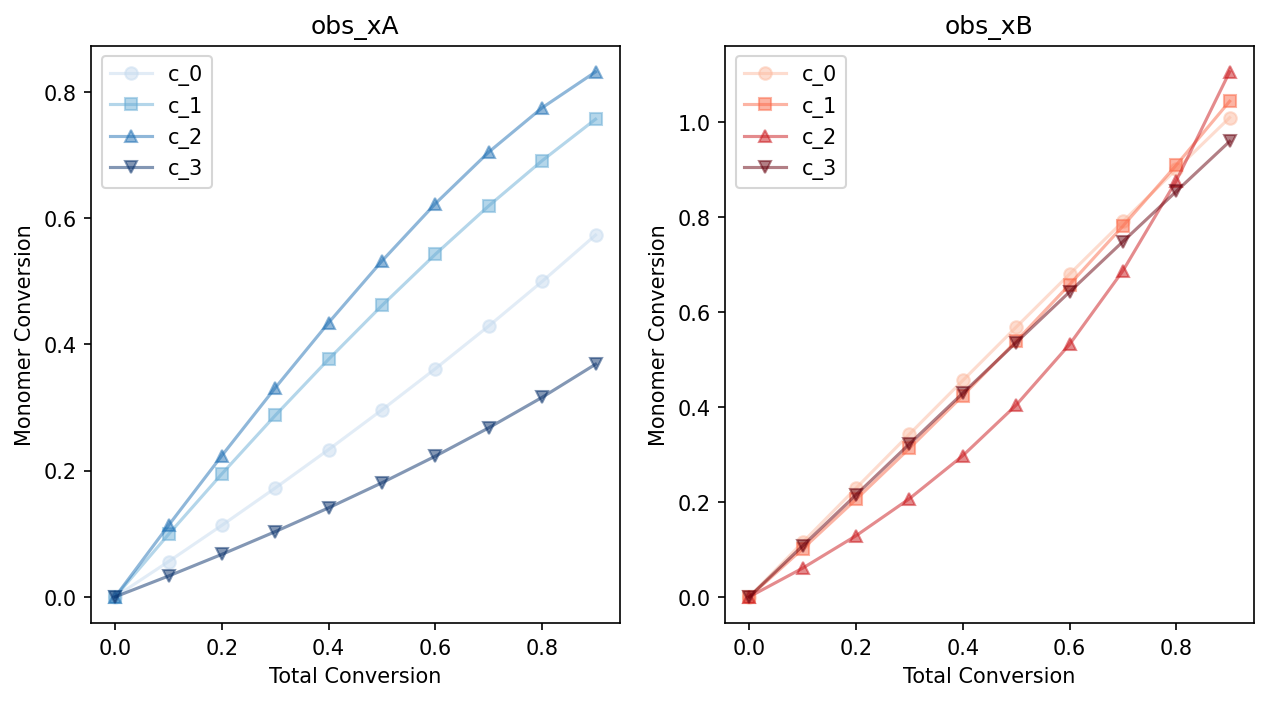

In [4]:
plot_all_measurements(
    importer.petab_problem.measurement_df,
    # group_by=C.SIMULATION_CONDITION_ID,
    group_by=C.OBSERVABLE_ID,
    format_axes_kwargs={
        "set_xlabel": "Total Conversion",
        "set_ylabel": "Monomer Conversion",
        # "set_xlim": (0, 1),
        # "set_ylim": (0, 1),
    },
    plot_style="both",
    alpha=0.5,
)
plt.show()

In [5]:
optimizer = optimize.ScipyOptimizer()  # method="Nelder-Mead")
history_options = pypesto.HistoryOptions(trace_record=True)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 1

# run optimization of problem 1
import amici

# problem.objective.amici_solver.setSensitivityMethod(amici.SensitivityMethod.forward)
problem.objective.amici_solver.setSensitivityOrder(amici.SensitivityOrder.none)
problem.objective.amici_solver.setMaxStepSize(1e-2)
# problem.objective.amici_solver.setSensitivityOrder(1)
# problem.objective.amici_solver.
result = optimize.minimize(
    problem=problem,
    optimizer=optimizer,
    n_starts=n_starts,
    engine=engine,
    history_options=history_options,
)

Engine will use up to 8 processes (= CPU count).
  0%|                                                     | 0/1 [00:00<?, ?it/s]

PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/CRP2_CPE


2025-02-17 23:01:57.078 - amici.swig_wrappers - DEBUG - [c_1][idas:IDAHandleFailure:CONV_FAILURE] At t = 0.59701 and h = 7.23837e-21, the corrector convergence failed repeatedly or with |h| = hmin.
2025-02-17 23:01:57.079 - amici.swig_wrappers - ERROR - [c_1][FORWARD_FAILURE] AMICI forward simulation failed at t = 0.59701: AMICI failed to integrate the forward problem
2025-02-17 23:01:57.082 - amici.swig_wrappers - ERROR - [c_0][OTHER] AMICI simulation failed: Wrapping of DAEs is not yet implemented from Python
2025-02-17 23:01:57.085 - amici.swig_wrappers - WARNING - [c_0][AMICI:NaN] AMICI encountered a NaN value for xdot[0] (xA) at t=0.000000 
2025-02-17 23:01:57.087 - amici.swig_wrappers - WARNING - [c_0][AMICI:NaN] AMICI encountered a NaN value for p[0] (rA) at t=0.000000 
2025-02-17 23:01:57.088 - amici.swig_wrappers - WARNING - [c_0][AMICI:NaN] AMICI encountered a NaN value for w[1] (kdAA) at t=0.000000 
2025-02-17 23:01:57.089 - amici.swig_wrappers - WARNING - [c_0][AMICI:NaN] A

In [ ]:
problem.objective.amici_model.getObservableIds()

In [ ]:
problem.objective.amici_model

In [15]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(),
    n_chains=3,
)

n_samples = 10000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    x0=np.array([1, 1, 0.0, 0.0]),
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

Initializing betas with "near-exponential decay".
  0%|                                                 | 0/10000 [00:00<?, ?it/s]2025-02-17 23:04:08.876 - amici.swig_wrappers - DEBUG - [c_0][idas:IDAHandleFailure:CONV_FAILURE] At t = 0.884066 and h = 2.21939e-38, the corrector convergence failed repeatedly or with |h| = hmin.
2025-02-17 23:04:08.877 - amici.swig_wrappers - ERROR - [c_0][FORWARD_FAILURE] AMICI forward simulation failed at t = 0.884066: AMICI failed to integrate the forward problem
2025-02-17 23:04:08.916 - amici.swig_wrappers - DEBUG - [c_2][idas:IDAHandleFailure:CONV_FAILURE] At t = 0.594067 and h = 1.4717e-20, the corrector convergence failed repeatedly or with |h| = hmin.
2025-02-17 23:04:08.916 - amici.swig_wrappers - ERROR - [c_2][FORWARD_FAILURE] AMICI forward simulation failed at t = 0.594067: AMICI failed to integrate the forward problem
2025-02-17 23:04:08.922 - amici.swig_wrappers - DEBUG - [c_2][idas:IDAHandleFailure:CONV_FAILURE] At t = 0.541502 and h = 1.9

Elapsed time: 60.96


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


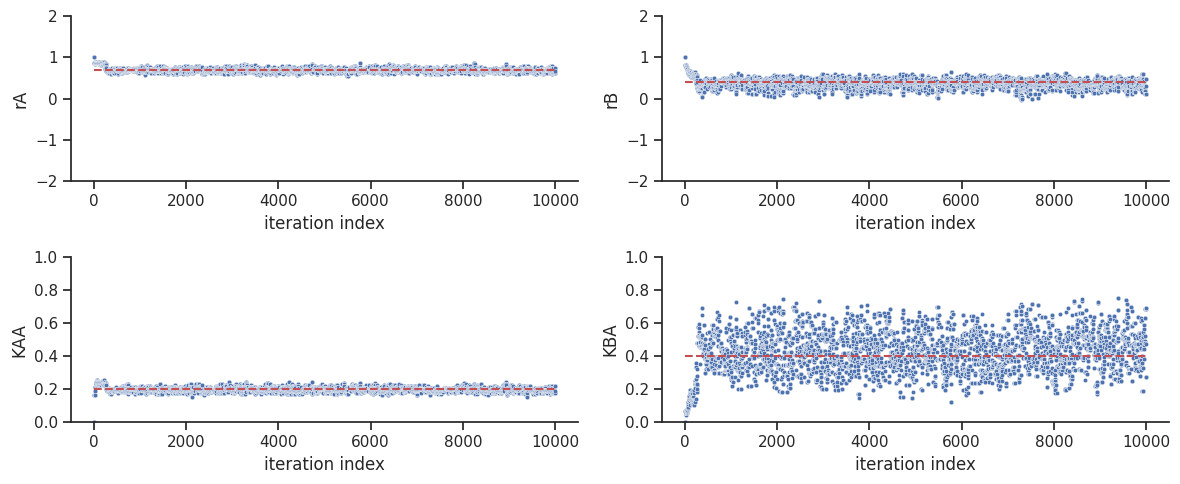

In [17]:
ax = visualize.sampling_parameter_traces(result, use_problem_bounds=True, size=(12, 5))

p = pg.by_id("p5").to_dict()
ax[0][0].plot([0, n_samples], np.log10([p["rA"], p["rA"]]), "r--")
ax[0][1].plot([0, n_samples], np.log10([p["rB"], p["rB"]]), "r--")
ax[1][0].plot([0, n_samples], [p["KAA"], p["KAA"]], "r--")
ax[1][1].plot([0, n_samples], [p["KBA"], p["KBA"]], "r--")

In [ ]:
['rA']